# Casa da Pedra: 
## Análise Exploratória de Dados

Análise dos dados do livro de registro utilizando Pandas e Matplotlib.
Os dados utilizados foram cedidos pela equipe da Casa da Pedra, localizada no município de Santana do Cariri, sul do Ceará.

### 1. Preparação do Notebook

In [1]:
# Importação dos pacotes necessários
from __future__ import division
import numpy as np
import pandas as pd

In [2]:
# Configuração das opções de output do Pandas
pd.set_option('display.notebook_repr_html', True) # Visualização em formato de tabela <'True'>
pd.set_option('display.max_columns', 10) # Máximo número de colunas
pd.set_option('display.max_rows', 20) # Máximo número de linhas

In [3]:
# Biblioteca para plotar gráficos
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
%pwd # Diretório atual

u'/Users/gabrielcorreadematos/CasaDaPedra'

In [6]:
import seaborn as sns
sns.set(color_codes=True)

//anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### 2. Importação dos dados

In [7]:
# Importar os dados
df = pd.read_csv('/Users/gabrielcorreadematos/CasaDaPedra/CasaDaPedra.csv',\
                    parse_dates=True, infer_datetime_format=True)

In [8]:
# Pré-visualização
df

,instituicao,nacionalidade,setor,n_pessoas,entrada,saida
0,UFPI,Brasil,Geologia,42,01/07/2016,NaN
1,UFPE,Brasil,Geologia,6,13/07/2016,26/07/2016
2,BR,Brasil,Geologia,2,13/07/2016,26/07/2016
3,UT,EUA,Geologia,1,13/07/2016,26/07/2016
4,BR,Brasil,Geologia,1,01/08/2016,10/08/2016
5,UERJ,Brasil,Geologia,1,01/08/2016,10/08/2016
6,UT,EUA,Geologia,1,01/08/2016,10/08/2016
7,UFPI,Brasil,Geografia,8,28/09/2016,29/09/2016
8,UFG,Brasil,Geologia,7,NaN,NaN
9,UFRJ,Brasil,Geologia,1,NaN,NaN


Os valores núméricos nulos estão representados por NaN e as variáveis de tempo por NaT.
Estes valores podem ser removidos com a função data.dropna()

In [9]:
df.dropna()

,instituicao,nacionalidade,setor,n_pessoas,entrada,saida
1,UFPE,Brasil,Geologia,6,13/07/2016,26/07/2016
2,BR,Brasil,Geologia,2,13/07/2016,26/07/2016
3,UT,EUA,Geologia,1,13/07/2016,26/07/2016
4,BR,Brasil,Geologia,1,01/08/2016,10/08/2016
5,UERJ,Brasil,Geologia,1,01/08/2016,10/08/2016
6,UT,EUA,Geologia,1,01/08/2016,10/08/2016
7,UFPI,Brasil,Geografia,8,28/09/2016,29/09/2016


### 3. Análise Exploratória com Pandas e Seaborn

Nesta etapa, as varávies são analisadas e classificadas de acordo com o tipo (categóricas ou numéricas), 
valores de tendência central (média, mediana) e dispersão (desvio padrão).
A análise foi feita utilizando pacotes Python que oferecem recursos estatísticos e de visualização, 
como Pandas e Seaborne.

In [10]:
# Dimensões da amostra
print 'Numero de Linhas: ', len(df)
print 'Numero de Colunas: ', len(df.columns)
print 'Dimensoes: ', df.shape

Numero de Linhas:  17
Numero de Colunas:  6
Dimensoes:  (17, 6)


Determinar os tipos de variáveis com a função '.dtypes'

In [11]:
df.dtypes

instituicao      object
nacionalidade    object
setor            object
n_pessoas         int64
entrada          object
saida            object
dtype: object

In [12]:
# Resumo estatístico de variáveis numéricas
df.describe()

,n_pessoas
count,17.000000
mean,7.764706
std,12.422406
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,42.000000


Apenas uma variável numérica (n_pessoas) foi encontrada no $DataFrame$

In [13]:
# Datas
# Tranformar datas string em Timestamps
df['entrada'] = pd.to_datetime(df['entrada'], dayfirst=True);
df['saida'] = pd.to_datetime(df['saida'], dayfirst=True);

# Calculando os períodos
df['periodos'] = df.saida - df.entrada

# Extrair número de dias dos períodos e utilizá-los como variável contínua
df['dias'] = df['periodos'].dt.days
df[['entrada', 'saida', 'periodos', 'dias']].head()

,entrada,saida,periodos,dias
0,2016-07-01,NaT,NaT,NaN
1,2016-07-13,2016-07-26,13 days,13.0
2,2016-07-13,2016-07-26,13 days,13.0
3,2016-07-13,2016-07-26,13 days,13.0
4,2016-08-01,2016-08-10,9 days,9.0


Nesta etapa foram criadas duas novas variáveis ($features$):

- Períodos ($TimeStamp$)
- Dias ($Floating$)

In [14]:
# Resumo estatístico de variáveis numéricas
df.describe()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,n_pessoas,periodos,dias
count,17.000000,7,7.000000
mean,7.764706,9 days 13:42:51.428571,9.571429
std,12.422406,4 days 06:37:41.940819,4.276180
min,1.000000,1 days 00:00:00,1.000000
25%,1.000000,9 days 00:00:00,NaN
50%,2.000000,9 days 00:00:00,NaN
75%,7.000000,13 days 00:00:00,NaN
max,42.000000,13 days 00:00:00,13.000000


### Variáveis categóricas

Três variáveis no arquivo são do tipo categóricas (string):

 - Instituição
 - Nacionaliade
 - Setor

Para cada linha no arquivo, temos: o registro da "Instituição", que pode ser de ensino, pesquisa ou empresa; a "Nacionalidade", que representa o país da Instituição e o "Setor" de conhecimento, ou área de estudo.

In [15]:
# Instituição
df['instituicao'].value_counts()

UFPI       2
UT         2
BR         2
UFRJ       2
UFPE       2
UFG        1
MFN        1
DNPM       1
UFC        1
UERJ       1
Dresden    1
UFRGS      1
Name: instituicao, dtype: int64

In [16]:
# Nacionalidade
df['nacionalidade'].value_counts()

Brasil      13
Alemanha     2
EUA          2
Name: nacionalidade, dtype: int64

In [17]:
# Setor
df['setor'].value_counts()

Geologia         12
Paleontologia     2
Geografia         1
Name: setor, dtype: int64

### Agrupamento dos dados 

Agrupamento de dados é uma técnica fundamental para analisar a relação numérica entre as variáveis categóricas. Em outras palavras, é uma forma de estudar as propriedades de cada classe de uma variável categórica. 

O agrupamento pode ser feito com o Pandas, utilizando as funções 'groupby' ou 'pivot_table', que gera novas 'Series' e 'DataFrames'.

As Series criadas pelo agrupamento podem ser reordenadas pelo somatório do número de pessoas para poderem ser visualizadas nos gráficos em ordem crescente ou descrescente.

In [18]:
# Soma do número de pessoas por Instituição
# Ordenando pelo número de pessoas
instituicao_list = df.pivot_table(index='instituicao', aggfunc=sum)\
                        .sort_values(by='n_pessoas', ascending=False) 
instituicao_list

,dias,n_pessoas
instituicao,,
UFPI,1.0,50
UFRJ,NaN,36
UFPE,13.0,24
UFG,NaN,7
UFC,NaN,4
BR,22.0,3
Dresden,NaN,2
UT,22.0,2
DNPM,NaN,1


In [19]:
# Soma do número de pessoas por área de conhecimento 
setor_list = df.groupby('setor')[['n_pessoas','dias']].sum()\
                  .sort_values(by='n_pessoas', ascending=False)
setor_list

,n_pessoas,dias
setor,,
Geologia,68,66.0
Paleontologia,53,NaN
Geografia,8,1.0


In [20]:
# Soma do número de pessoas por nacionalidade
nacionalidade_list = df.groupby('nacionalidade')[['n_pessoas','dias']].sum()\
                .sort_values(by='n_pessoas', ascending=False)
nacionalidade_list

,n_pessoas,dias
nacionalidade,,
Brasil,127,45.0
Alemanha,3,NaN
EUA,2,22.0


Seguindo com a análise das relações entre as variáveis numéricas e categorias.

In [21]:
# Criando DataFrame a partir do agrupamento de categorias 
# utilizando pivot_table
df_pivot = df.pivot_table(index='instituicao', columns='setor', \
                                aggfunc={'n_pessoas':sum,'dias':sum})
df_pivot

n_pessoas                             dias                       
setor       Geografia Geologia Paleontologia Geografia Geologia Paleontologia
instituicao                                                                  
BR                NaN      3.0           NaN       NaN     22.0           NaN
DNPM              NaN      1.0           NaN       NaN      NaN           NaN
UERJ              NaN      1.0           NaN       NaN      9.0           NaN
UFC               NaN      4.0           NaN       NaN      NaN           NaN
UFG               NaN      7.0           NaN       NaN      NaN           NaN
UFPE              NaN      6.0          18.0       NaN     13.0           NaN
UFPI              8.0     42.0           NaN       1.0      NaN           NaN
UFRGS             NaN      1.0           NaN       NaN      NaN           NaN
UFRJ              NaN      1.0          35.0       NaN      NaN           NaN
UT                NaN      2.0           NaN       NaN     22.0           NaN

### Visualização dos dados com Seaborn

 - Histogramas

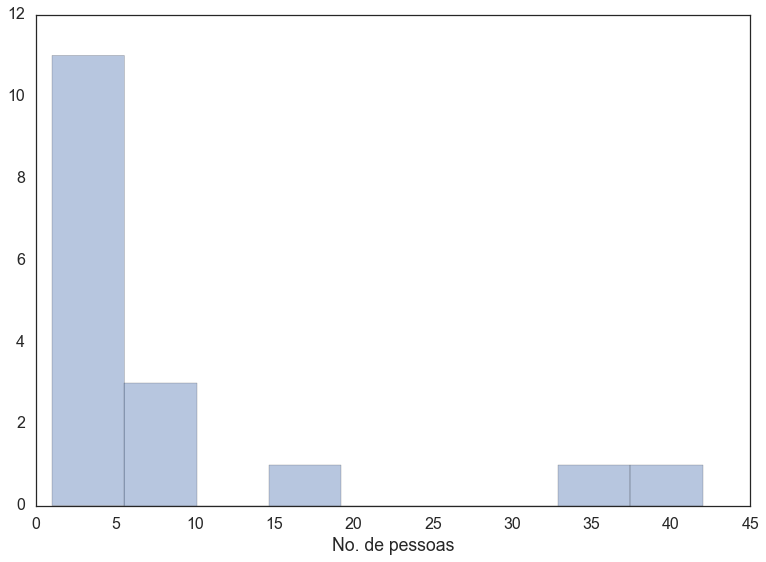

In [22]:
# Histograma do n_pessoas do df com Seaborn
with sns.axes_style('white'):
    sns.set_context("poster");
    h = sns.distplot(df['n_pessoas'], \
                     kde=False, \
                     axlabel="No. de pessoas");

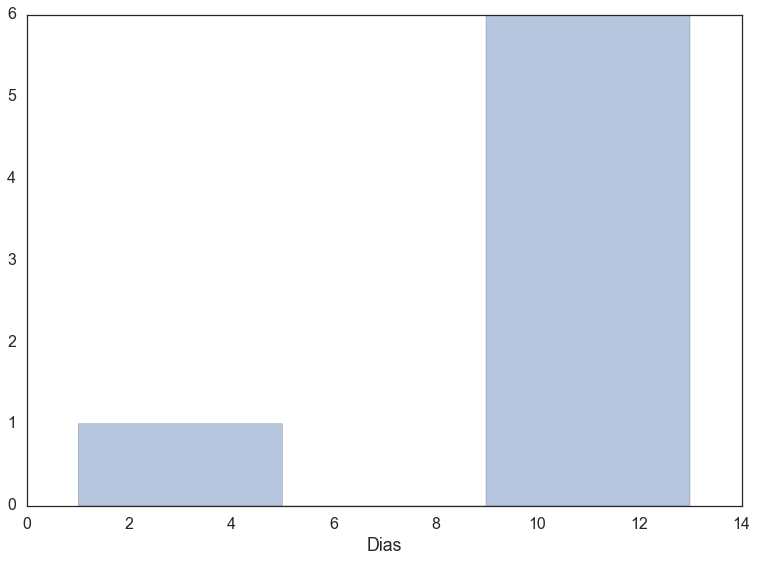

In [23]:
# Histograma do n_pessoas do df com Seaborn
with sns.axes_style('white'):
    sns.set_context("poster");
    h = sns.distplot(df['dias'].dropna(), \
                     kde=False, \
                     axlabel="Dias");

 - Gráficos de barras

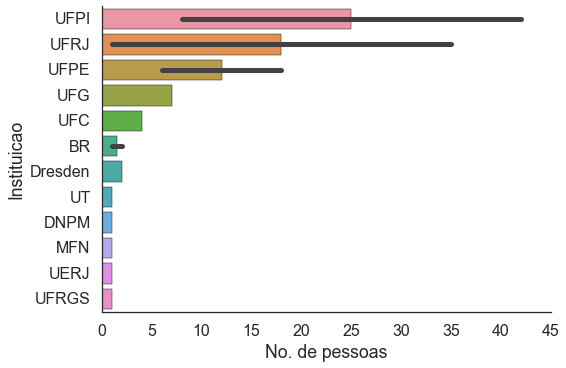

In [24]:
# Gráficos de barras com as somas do número de pessoas por 
# instituição
with sns.axes_style('white'):
    sns.set_context("poster");
    b = sns.factorplot(x='n_pessoas', y='instituicao', \
                       kind='bar', \
                       data=df, \
                       order=instituicao_list.index, \
                       aspect=1.5, size=5.5);
plt.xlabel("No. de pessoas");
plt.ylabel("Instituicao");

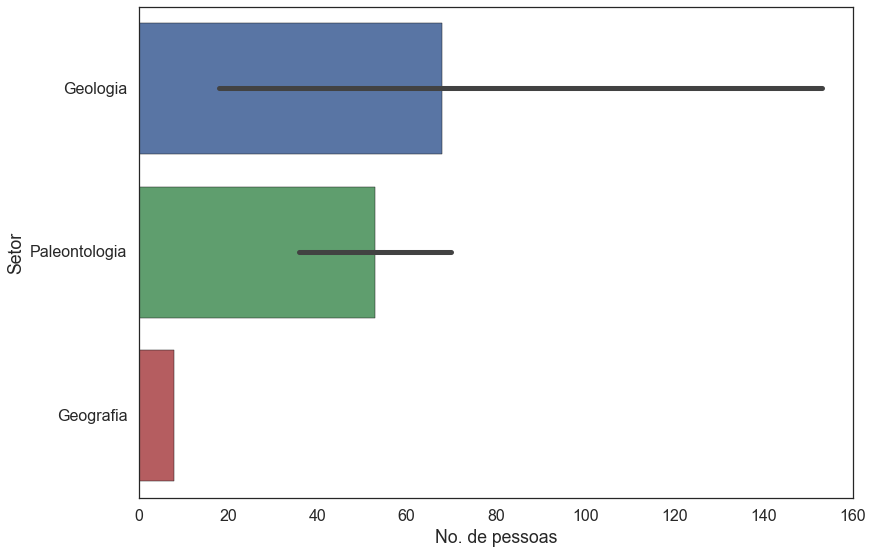

In [25]:
with sns.axes_style('white'):
    sns.set_context("poster");
    g = sns.barplot(x='n_pessoas', y='setor', \
            data=df, \
            order=setor_list.index, \
            estimator=np.sum);
plt.xlabel("No. de pessoas");
plt.ylabel("Setor");

### Análise de correlação
Para analisar a correlação entre as propriedades numéricas, podemos utilizar gráficos como:

 - Joint plots

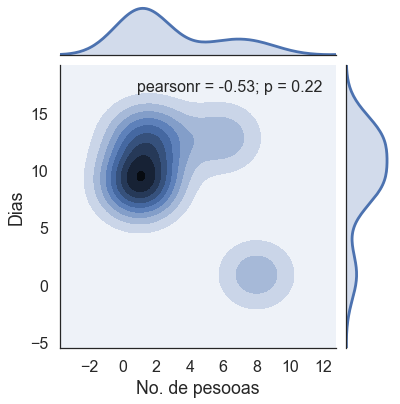

In [26]:
# Outra formatação do Joint plot
with sns.axes_style('white'):
    g = sns.jointplot('n_pessoas', 'dias', data=df, kind='kde')
    g.set_axis_labels("No. de pesooas", "Dias");

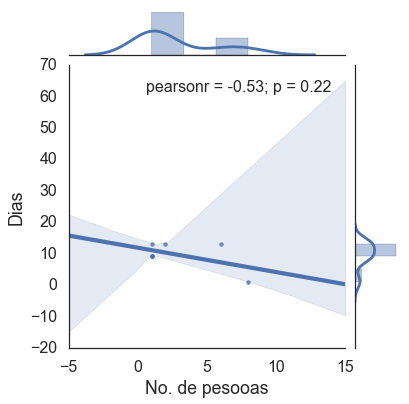

In [27]:
with sns.axes_style('white'):
    g = sns.jointplot('n_pessoas', 'dias', df, kind='reg')
    g.set_axis_labels("No. de pesooas", "Dias");

 - Pair plot

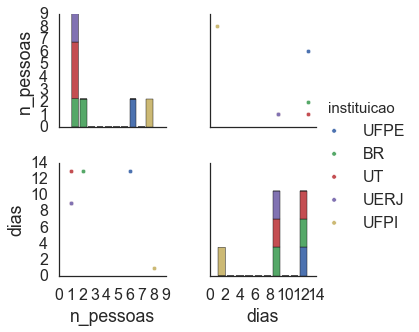

In [28]:
with sns.axes_style('white'):
    sns.pairplot(df.dropna(), hue='instituicao', size=2.5);

 - Histogramas facetados

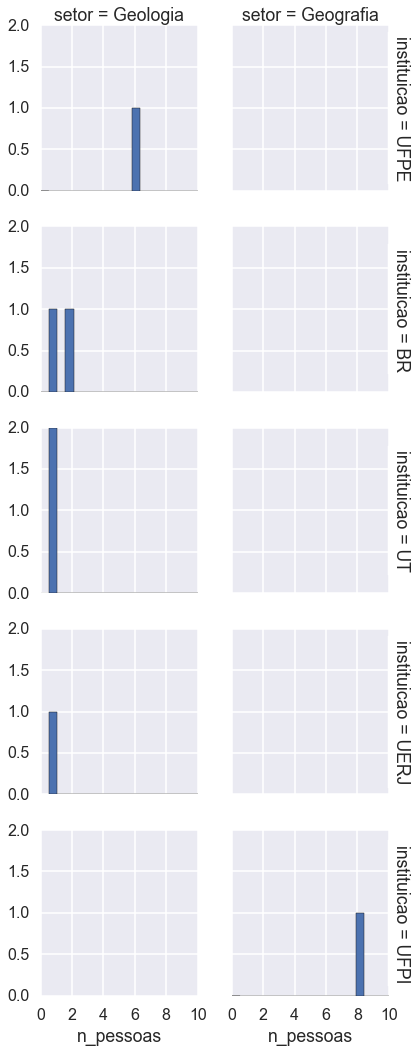

In [29]:
grid = sns.FacetGrid(df.dropna(), row='instituicao', col='setor', margin_titles=True)
grid.map(plt.hist, 'n_pessoas', bins=np.linspace(0,10,20));